<AxesSubplot: xlabel='data1', ylabel='Density'>

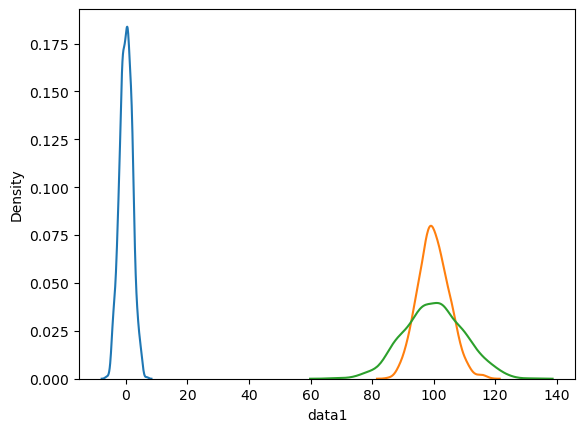

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

def qqPlot(data,refData):
    # Create sorted quantiles of the data and the corresponding theoretical quantiles
    # each data point gets a quantile in both the sorted quantiles,theoretical quantiles (refernce data)
    sorted_data = np.sort(data)
    theoretical_quantiles = np.percentile(refData, np.linspace(0, 100, len(refData)))

    # Plot the QQ plot
    plt.figure()
    plt.scatter(theoretical_quantiles, sorted_data ,marker = ".")
    plt.plot(theoretical_quantiles, theoretical_quantiles, color='r')
    plt.title('QQ Plot of Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()



def qqFit(data1,data2,data3):
    data1_quantiles = np.percentile(data1, np.linspace(0, 100, len(data3)))
    data2_quantiles = np.percentile(data2, np.linspace(0, 100, len(data3)))
    # we assume the distribution of data1,data2 is the same  
    # changes are due to machne error (they are anchor to each other) 
    # create lookup table where for any quantile q2_i in data2  
    # f(q2_i)=q1_i:
    # data2_into_data1 =np.interp(data3, data2_quantiles, data1_quantiles)
    
    # data3 is not with the same distribution as data1,data2 but with same errors as data 2
    # i.e we transfer it to be with same errors as data1 to be able to compare to each other
    data3_into_data1 = np.interp(data3, data2_quantiles, data1_quantiles)
    return data3_into_data1

def LinearFit(data1,data2,data3):
    # we assume the distribution of data1,data2 is the same  
    # changes are due to machine error (they are anchor to each other) 
    # create lookup table where for any quantile q2_i in data2  

    
    # data3 is not with the same distribution as data1,data2 but with same errors as data 2
    # i.e we transfer it to be with same errors as data1 to be able to compare to each other
    mu1 = np.mean(data1)
    sigma1 = np.std(data1)
    mu2 = np.mean(data2)
    sigma2 = np.std(data2)

    data3_into_data1 = (data3/sigma2-mu2/sigma2 + mu1/sigma1)*sigma1
    return data3_into_data1

def fit(data1,data2,data3):

    # we assume the distribution of data1,data2 is the same  
    # changes are due to machine error (they are anchor to each other) 
    # create lookup table where for any quantile q2_i in data2  
    # f(q2_i)=q1_i:
    # data2_into_data1 =np.interp(data3, data2_quantiles, data1_quantiles)
    
    # data3 is not with the same distribution as data1,data2 but with same errors as data 2
    # i.e we transfer it to be with same errors as data1 to be able to compare to each other
    data1 = np.array(data1)
    data2 = np.array(data2)
    data3 = np.array(data3)

    data2_quantiles = np.percentile(data2, np.linspace(0, 100, len(data2)))
    ind = (data3>np.max(data2_quantiles))*1 +(data3<np.min(data2_quantiles))*1
    ind1 =[i for i in np.arange(data3.shape[0]) if ind[i]==1]
    ind2 =[i for i in np.arange(data3.shape[0]) if ind[i]==0]
    
    data3_into_data1 = np.zeros(data3.shape[0])

    data3_into_data1[ind1] = LinearFit(data1,data2,data3[ind1])
    data3_into_data1[ind2] = qqFit(data1,data2,data3[ind2])
    

    return data3_into_data1, qqFit(data1,data2,data3[ind2])



df = pd.DataFrame({'data1':np.random.normal(loc=0, scale=2, size=1000),
                    'data2': np.random.normal(loc=100, scale=5, size=1000),
                    'data3': np.random.normal(loc=100, scale=10, size=1000)})
                   

# data1 = np.random.normal(loc=40, scale=5, size=1000)
# data2 = np.random.normal(loc=5, scale=4, size=100)
# data3 = np.random.normal(loc=7, scale=2, size=500)
sns.kdeplot(df['data1'])
sns.kdeplot(df['data2'])
sns.kdeplot(df['data3'])




# qqfit
df['data3_into_data1_qq'] = qqFit(df['data1'],df['data2'],df['data3'])
sns.kdeplot(df['data3_into_data1_qq'])
# LinearFit
df['data3_into_data1_LinearFit'] = LinearFit(df['data1'],df['data2'],df['data3'])
sns.kdeplot(df['data3_into_data1_LinearFit'])

# data3_into_data1_qq_drop - drop values outside range of data2
# data3_into_data1_qqWithLinear - fit values outside range of data2 using linear


df['data3_into_data1_qqWithLinear'],data3_into_data1_qq_drop = fit(df['data1'],df['data2'],df['data3'])
sns.kdeplot(df['data3_into_data1_qqWithLinear'])


sns.kdeplot(data3_into_data1_qq_drop)

<AxesSubplot: xlabel='data1', ylabel='Density'>

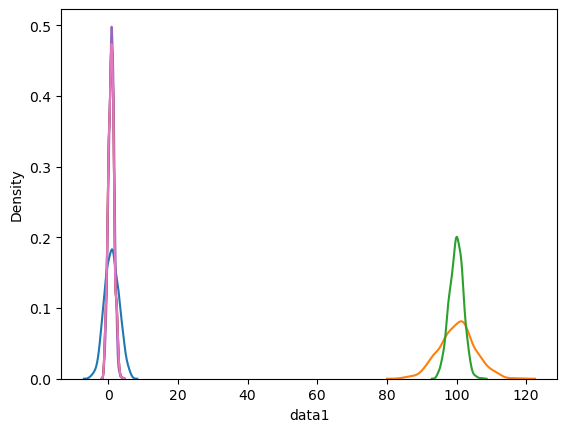

<AxesSubplot: xlabel='data3_into_data1_qq', ylabel='Density'>

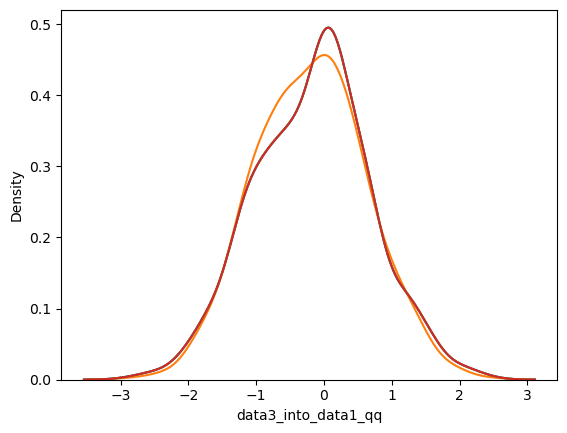